In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices.csv')

In [4]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [15]:
sns.set_theme()

<AxesSubplot:xlabel='area', ylabel='price'>

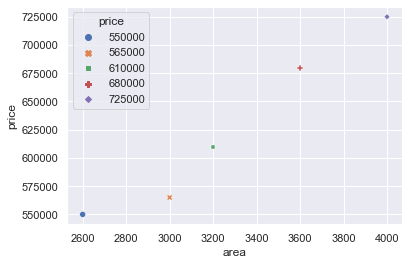

In [16]:
sns.scatterplot(data=df, x='area', y='price', hue='price', style='price', palette='deep')

In [17]:
reg = linear_model.LinearRegression()

In [30]:
reg.fit(df[['area']],df.price)

LinearRegression()

In [31]:
reg.predict([[3300]])

array([628715.75342466])

In [34]:
reg.coef_

array([135.78767123])

In [35]:
reg.intercept_

180616.43835616432

In [36]:
135.78767123*3300 + 180616.43835616432

628715.7534151643

In [37]:
reg.predict([[5000]])

array([859554.79452055])

In [38]:
d = pd.read_csv('areas.csv')

In [39]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [40]:
p = reg.predict(d)

In [41]:
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [42]:
d['prices'] = p

In [43]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [45]:
d.to_csv('predicted_prices.csv', index=False)

<AxesSubplot:xlabel='area'>

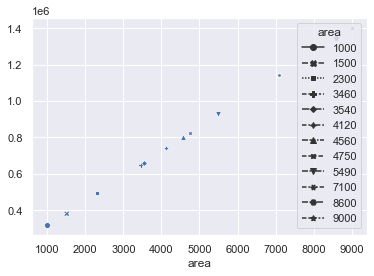

In [62]:
sns.lineplot(data=d, x='area', y=reg.predict(d[['area']]), markers=True, style='area')

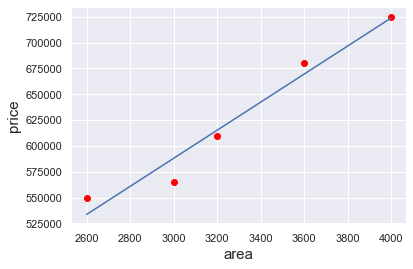

In [66]:
plt.xlabel('area', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.scatter(df.area, df.price, color='red')
plt.plot(df.area, reg.predict(df[['area']]))